In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
training_set = df_train.iloc[:,1:2].values

In [7]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler(feature_range=(0,1))
sc

MinMaxScaler()

In [11]:
train_scaled = sc.fit_transform(training_set)

In [12]:
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [13]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [15]:
X_train.shape

(1198, 60)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [19]:
X_train


array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

2022-10-23 12:42:16.239445: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-23 12:42:16.497580: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-23 12:42:16.497604: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-23 12:42:16.531052: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-23 12:42:17.591143: W tensorflow/stream_executor/platform/de

In [21]:
reg = Sequential()

2022-10-23 12:42:20.211506: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-23 12:42:20.211785: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-23 12:42:20.211807: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (satvik-hp): /proc/driver/nvidia/version does not exist
2022-10-23 12:42:20.213510: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
reg.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50, return_sequences= True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50, return_sequences= True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))
reg.add(Dense(units=1))

In [23]:
reg.compile(optimizer='adam', loss = 'mean_squared_error')

In [24]:
reg.fit(X_train, y_train, epochs = 100, batch_size = 32)
#early stop

Epoch 1/100
38/38 [==============================] - 10s 90ms/step - loss: 0.0389
Epoch 2/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0039
Epoch 13/100
38/38 [====

In [25]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [26]:
df_test.head()
test_set = df_test.iloc[:,1:2].values

In [27]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [28]:
datat = pd.concat((df_train['Open'], df_test['Open']), axis=0)
datat

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [29]:
inputs = datat[len(datat) - len(df_test) - 60 :].values
inputs = inputs.reshape(-1,1)
#inputs.shape
inputs = sc.fit_transform(inputs)
#inputs

In [30]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [31]:
pred = reg.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [32]:
pred

array([[0.45993188],
       [0.4346094 ],
       [0.4216559 ],
       [0.42279515],
       [0.44560665],
       [0.4994626 ],
       [0.56563795],
       [0.6108152 ],
       [0.63151026],
       [0.6364269 ],
       [0.6336964 ],
       [0.62728333],
       [0.62038946],
       [0.6192684 ],
       [0.624412  ],
       [0.6615047 ],
       [0.73026586],
       [0.8136389 ],
       [0.86672515],
       [0.8425564 ]], dtype=float32)

In [33]:
prediction = sc.inverse_transform(pred)

In [34]:
prediction

array([[787.46484],
       [785.10425],
       [783.8968 ],
       [784.0029 ],
       [786.12946],
       [791.1499 ],
       [797.3188 ],
       [801.5302 ],
       [803.4594 ],
       [803.91766],
       [803.66315],
       [803.06537],
       [802.4227 ],
       [802.3182 ],
       [802.7977 ],
       [806.25543],
       [812.6654 ],
       [820.43744],
       [825.38617],
       [823.1331 ]], dtype=float32)

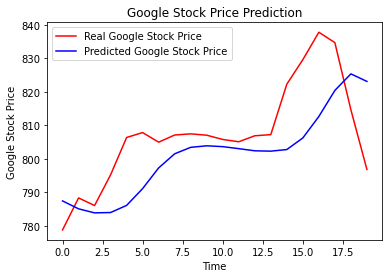

In [35]:
plt.plot(test_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(prediction, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()